In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

root_dir = '/home/giova/workspace/predicting-beats-per-minutes-of-songs/predicting-beats-per-minutes-of-songs'
df = pd.read_csv(f'{root_dir}/data/raw/train.csv')
print(f"numerical columns: {df.select_dtypes(include=[np.number]).columns.tolist()}")
print(f"categorical columns: {df.select_dtypes(include=['object']).columns.tolist()}")
df.info()

numerical columns: ['id', 'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality', 'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore', 'TrackDurationMs', 'Energy', 'BeatsPerMinute']
categorical columns: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524

In [2]:
df.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257587,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


In [3]:
df.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


<Axes: >

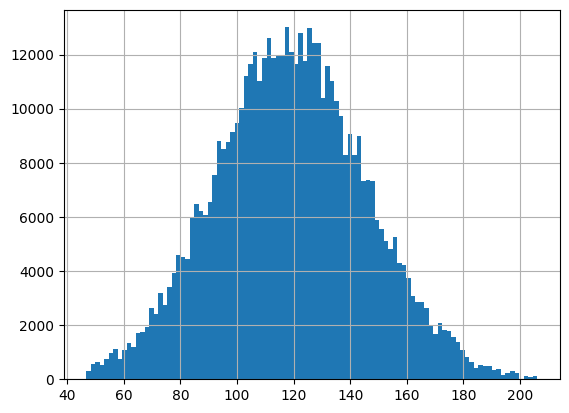

In [4]:
target = "BeatsPerMinute"

df[target].hist(bins=100)

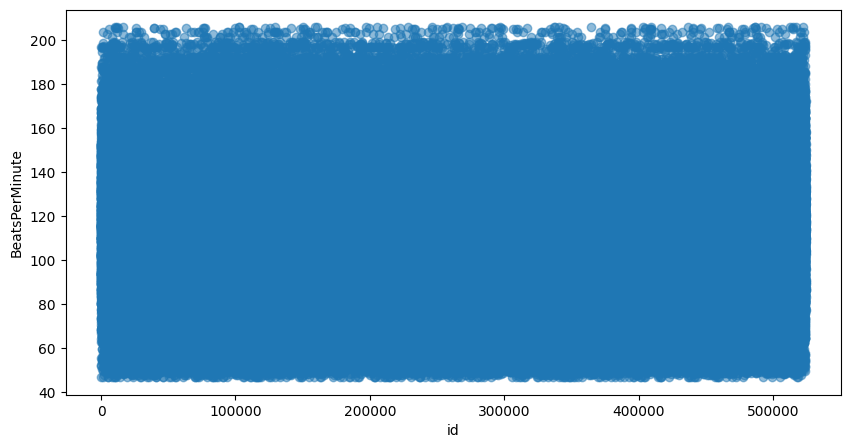

Correlation between id and BeatsPerMinute: -0.00035462261195836627


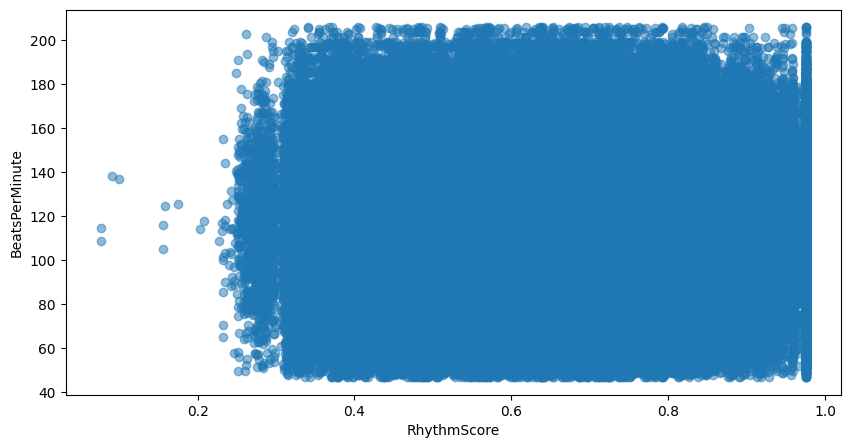

Correlation between RhythmScore and BeatsPerMinute: 0.005440112910907498


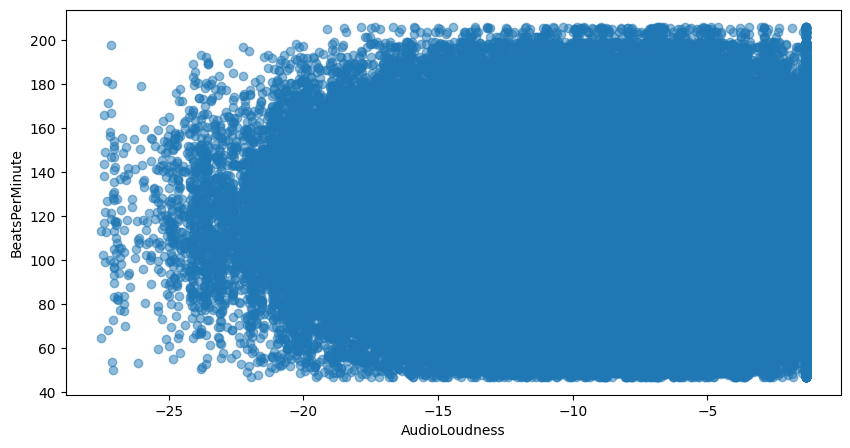

Correlation between AudioLoudness and BeatsPerMinute: -0.0033267126833880748


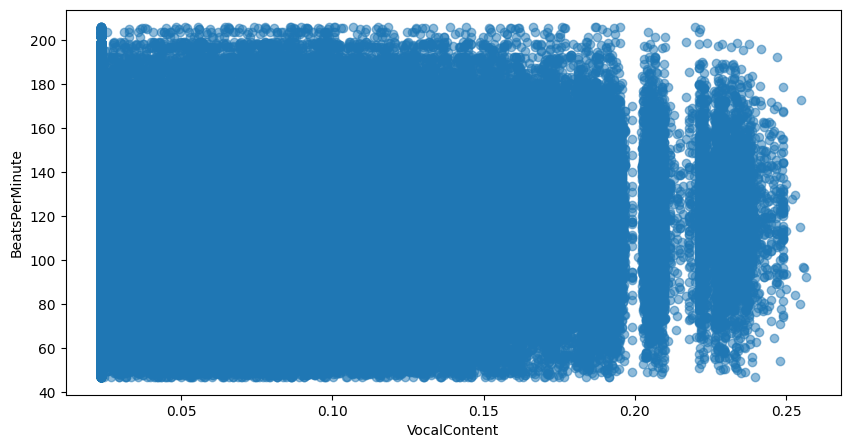

Correlation between VocalContent and BeatsPerMinute: 0.004876393670068295


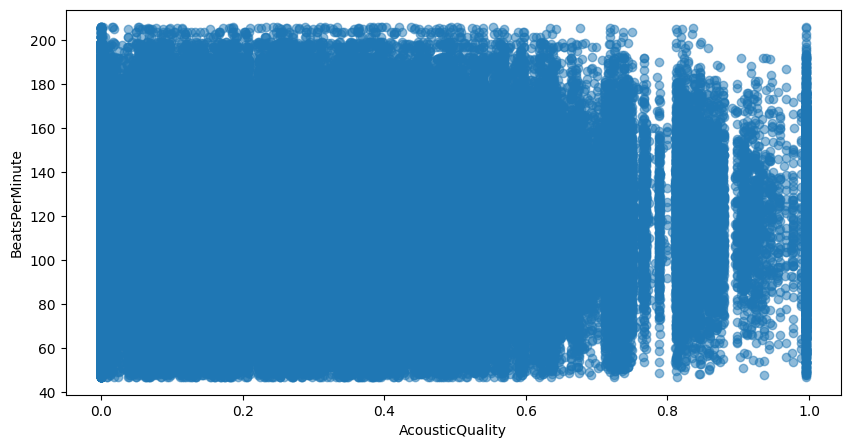

Correlation between AcousticQuality and BeatsPerMinute: -0.0008196325866986863


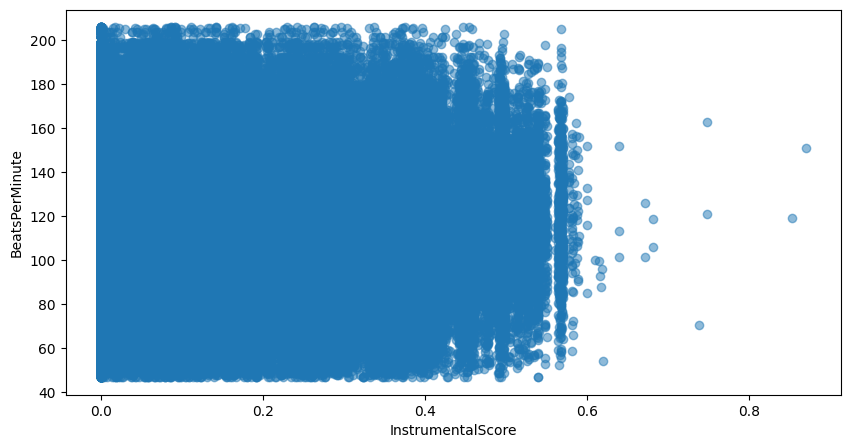

Correlation between InstrumentalScore and BeatsPerMinute: 0.0019002378700735338


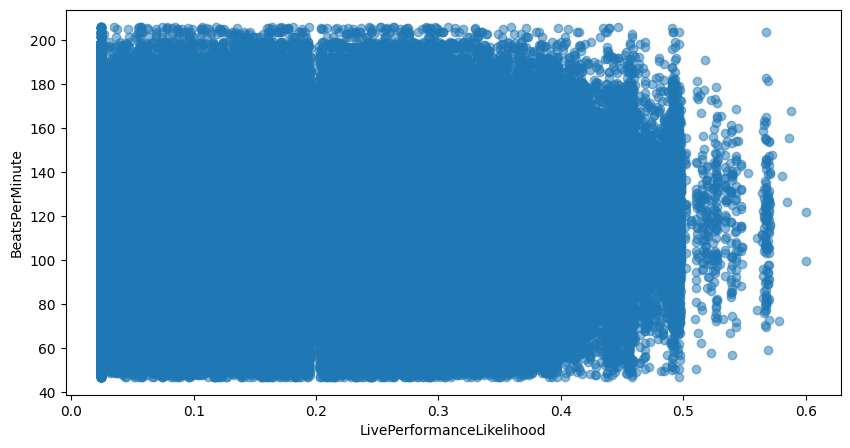

Correlation between LivePerformanceLikelihood and BeatsPerMinute: 0.0034706801686868885


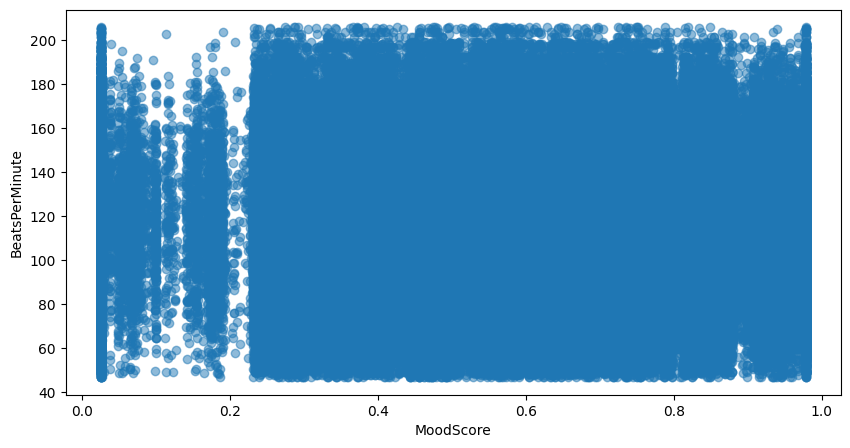

Correlation between MoodScore and BeatsPerMinute: 0.007058822581937845


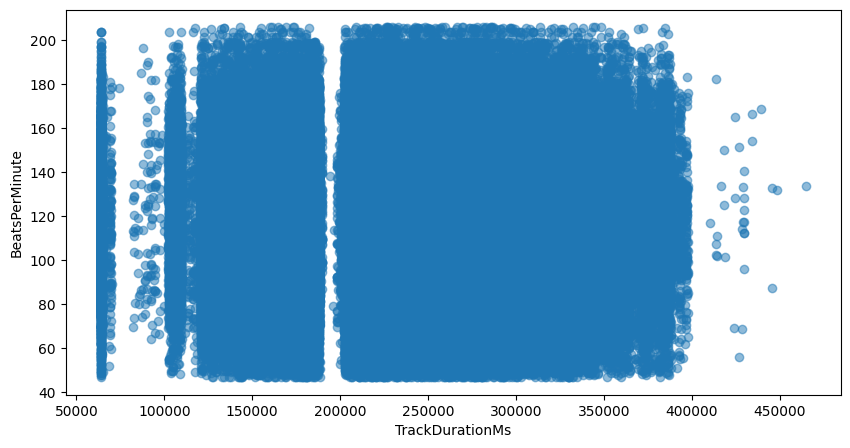

Correlation between TrackDurationMs and BeatsPerMinute: 0.006637172217714398


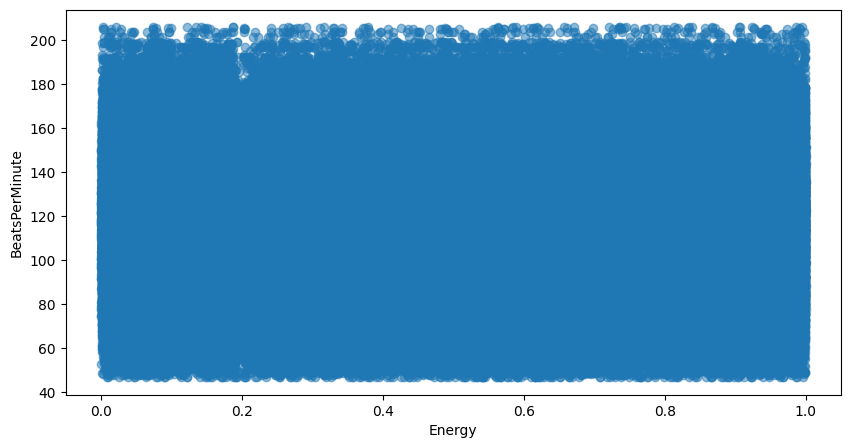

Correlation between Energy and BeatsPerMinute: -0.004375241222586869


In [6]:
for col in df.columns:
    if col != target:
        plt.figure(figsize=(10, 5))
        plt.scatter(df[col], df[target], alpha=0.3)
        plt.xlabel(col)
        plt.ylabel(target)
        plt.show()
        print(f"Correlation between {col} and {target}: {df[col].corr(df[target])}")


In [15]:
external_data = pd.read_csv(f'{root_dir}/data/external/Train.csv')
external_data.shape == df.shape
print(f"External data shape: {external_data.shape}")
print(f"Train data shape: {df.shape}")

External data shape: (14633, 10)
Train data shape: (524164, 11)


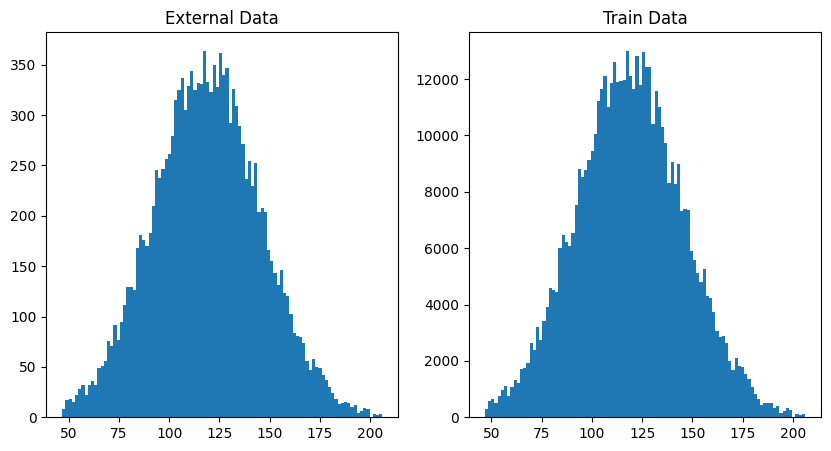

In [21]:
#plot the distribution of the target variable in the external data and the train data in different plots
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1, 2, 1)
ax1.hist(external_data[target], bins=100)
ax1.set_title('External Data')
ax2 = plt.subplot(1, 2, 2)
ax2.hist(df[target], bins=100)
ax2.set_title('Train Data')
plt.show()

#plot the distribution of the target variable in the external data and the train data in different plots



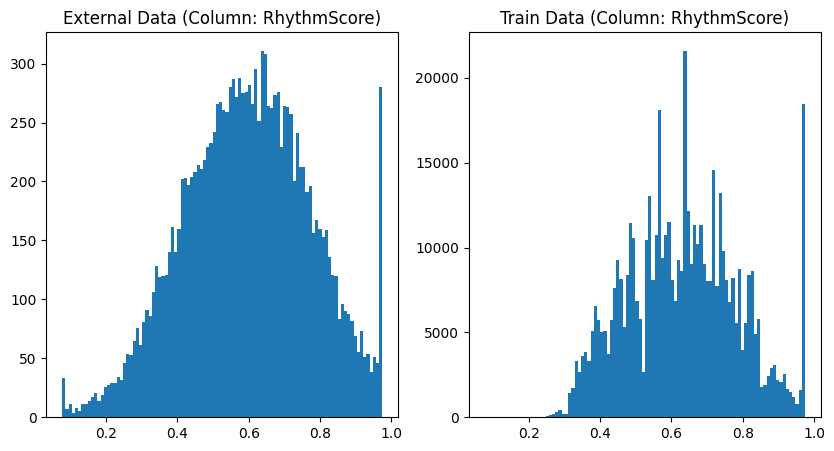

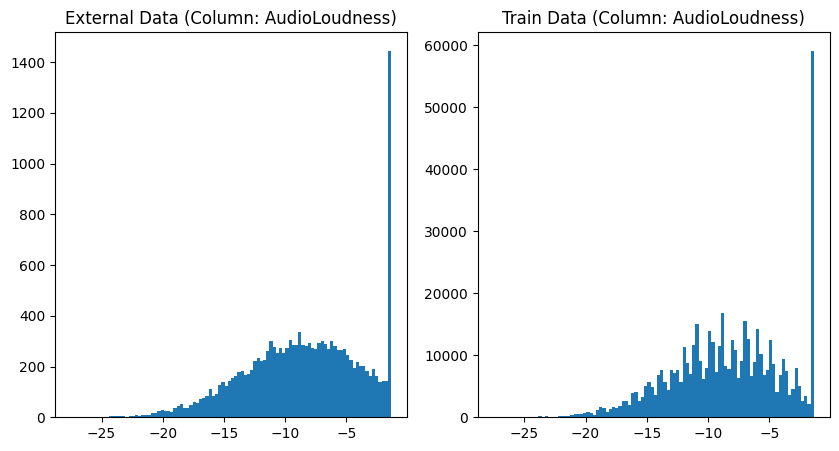

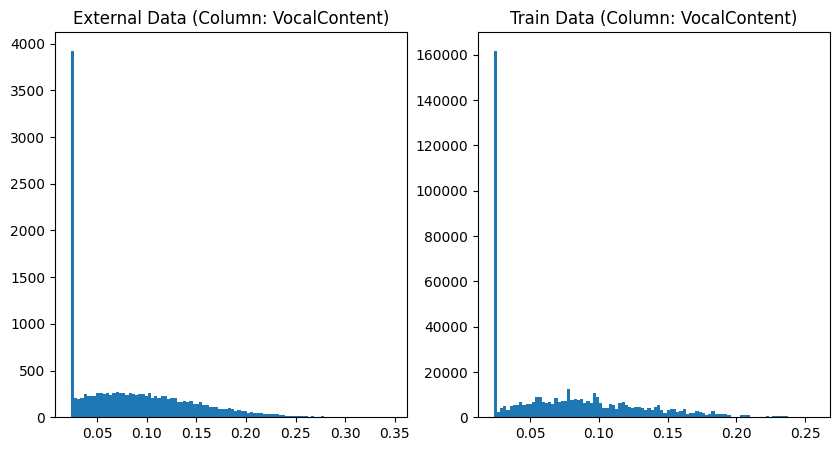

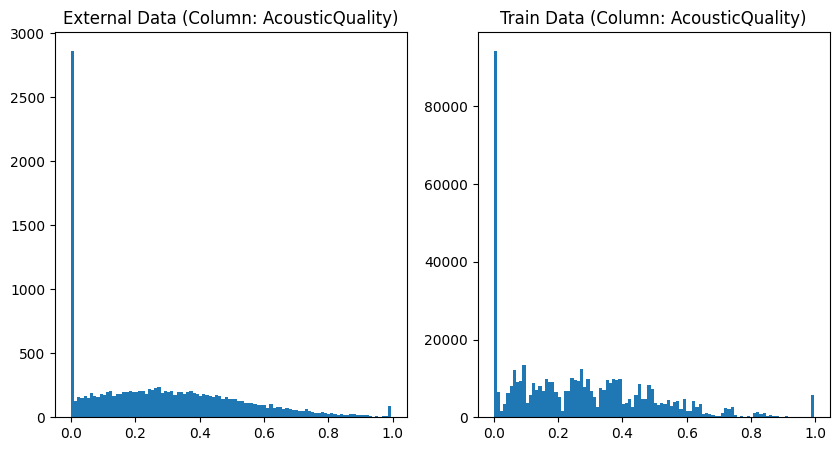

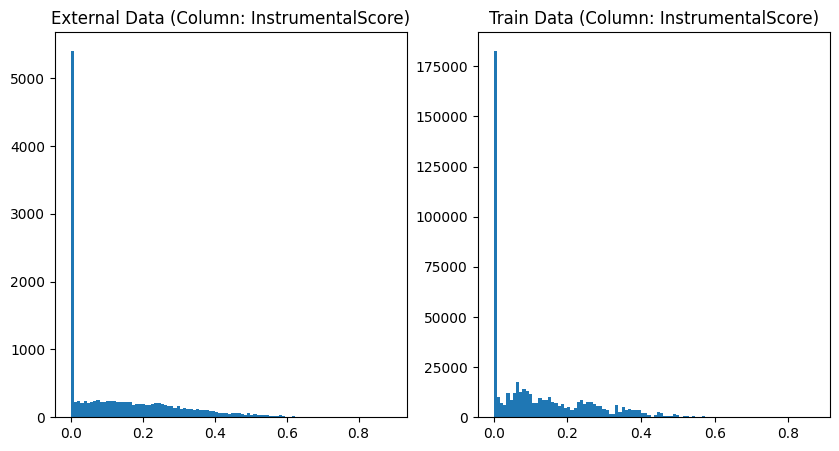

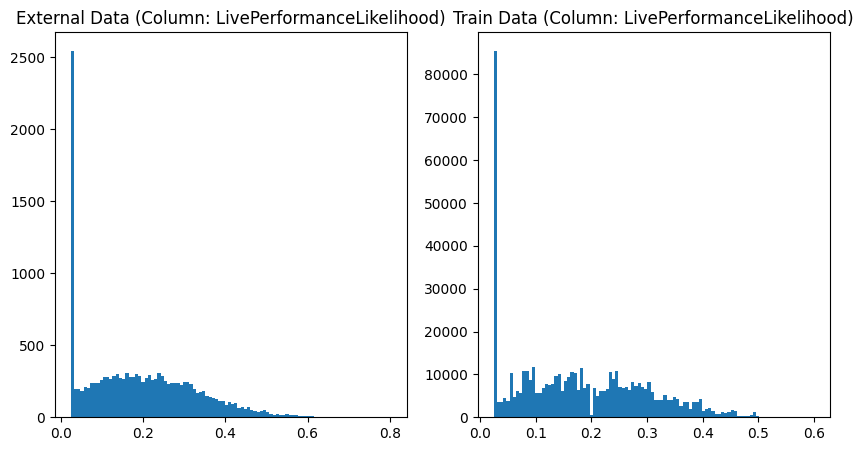

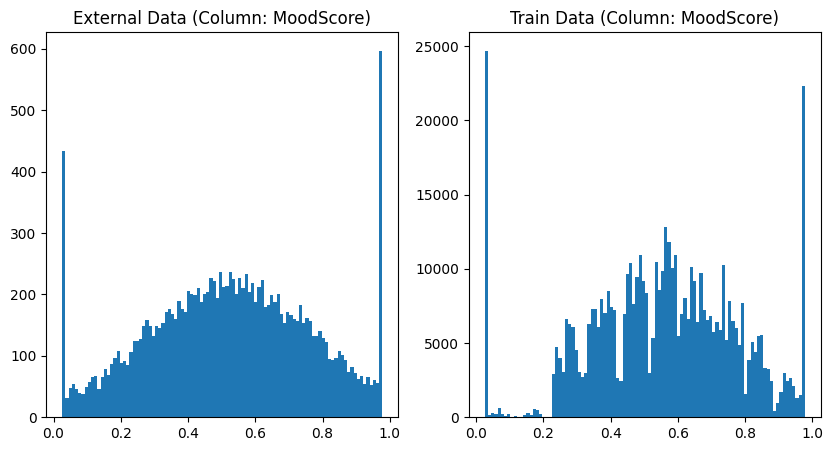

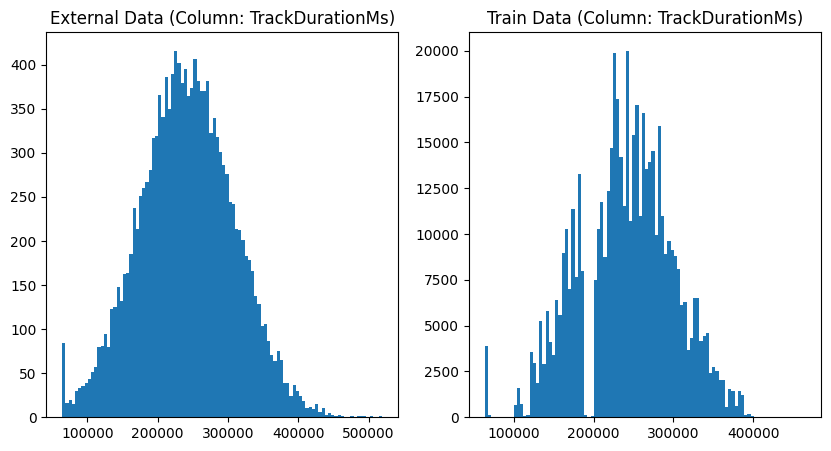

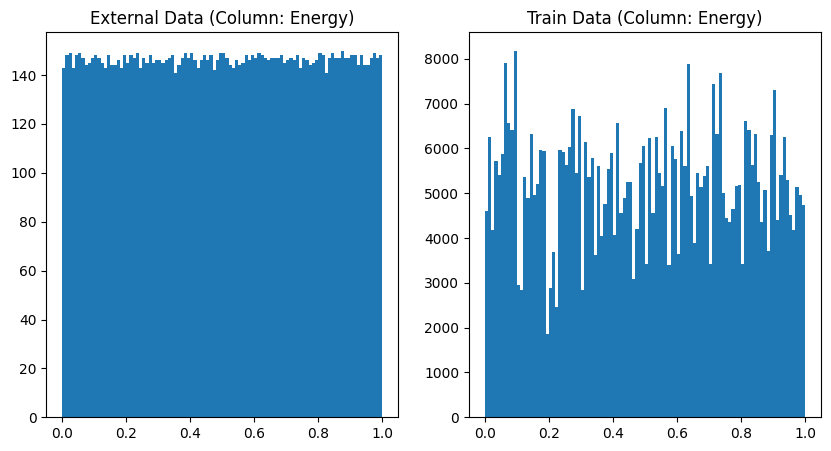

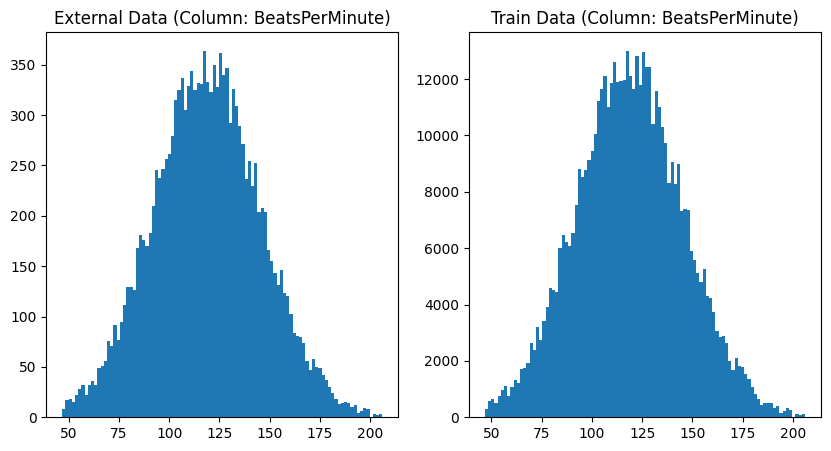

In [26]:
for col in df.columns:
    if col == "id":
        continue
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1, 2, 1)
    ax1.hist(external_data[col], bins=100)
    ax1.set_title(f'External Data (Column: {col})')
    ax2 = plt.subplot(1, 2, 2)
    ax2.hist(df[col], bins=100)
    ax2.set_title(f'Train Data (Column: {col})')
    plt.show()

In [32]:
df[["RhythmScore", "AudioLoudness", "VocalContent", "AcousticQuality", "InstrumentalScore", "LivePerformanceLikelihood", "MoodScore", "TrackDurationMs", "Energy", "BeatsPerMinute"]].describe().to_dict()

{'RhythmScore': {'count': 524164.0,
  'mean': 0.6328432020360016,
  'std': 0.15689919180689418,
  'min': 0.0769,
  '25%': 0.515849557,
  '50%': 0.634686335,
  '75%': 0.739179248,
  'max': 0.975},
 'AudioLoudness': {'count': 524164.0,
  'mean': -8.37901437502717,
  'std': 4.616221224477184,
  'min': -27.50972513,
  '25%': -11.5519332725,
  '50%': -8.2524990605,
  '75%': -4.912298364,
  'max': -1.357},
 'VocalContent': {'count': 524164.0,
  'mean': 0.07444294505726992,
  'std': 0.04993855162703297,
  'min': 0.0235,
  '25%': 0.0235,
  '50%': 0.06642450450000001,
  '75%': 0.10734286574999999,
  'max': 0.256401015},
 'AcousticQuality': {'count': 524164.0,
  'mean': 0.26291257226875914,
  'std': 0.223120201998304,
  'min': 5.36e-06,
  '25%': 0.069413096,
  '50%': 0.24250187499999998,
  '75%': 0.39695659099999997,
  'max': 0.995},
 'InstrumentalScore': {'count': 524164.0,
  'mean': 0.11769023128813944,
  'std': 0.13184466105070422,
  'min': 1.07e-06,
  '25%': 1.07e-06,
  '50%': 0.0742474575,
